20BRS1092 - NETHRA SAI

DECISION TREE USING GINI INDEX AND INFORMATION GAIN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Day.csv")
df=df.drop(["Day"],axis=1)

In [ ]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes


In [ ]:
col_names=["Outlook","Temperature","Humidity","Wind","Play"]

x=df.drop(["Play"],axis=1)
y=df["Play"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.5 MB/s 


In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=["Outlook","Temperature","Humidity","Wind"])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Outlook,Temperature,Humidity,Wind
8,1,1,1,1
2,2,2,2,1
1,1,2,2,2
13,3,3,2,2
4,3,1,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6000


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.6000


[Text(0.4, 0.875, 'X[2] <= 1.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.625, 'X[3] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.375, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

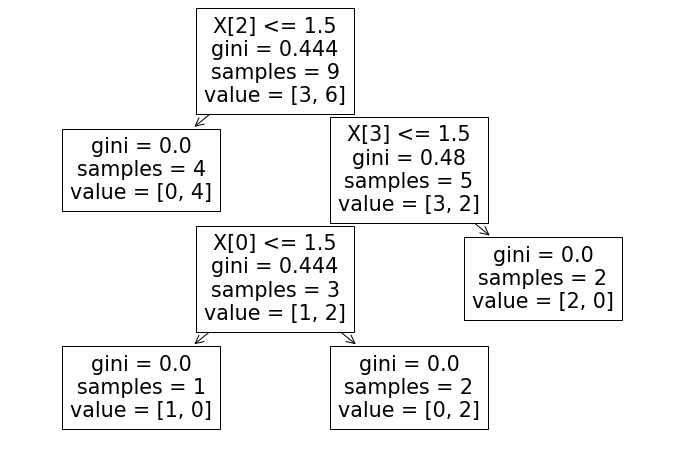

In [ ]:
#Decision tree Visualization
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_en = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1 1]
 [1 2]]


In [ ]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy score: ",format(accuracy_score(y_test, y_pred_en)))
precision=precision_score(y_test,y_pred_en,average='micro')
recall=recall_score(y_test,y_pred_en,average='micro')
f1 = f1_score(y_test,y_pred_en,average='micro')
print('Precision: %.3f'%precision)
print('Recall: %.3f'%recall)
print('F1 Score: %.3f'%f1)

Accuracy score:  0.6
Precision: 0.600
Recall: 0.600
F1 Score: 0.600


In [ ]:
en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
en.fit(X_train, y_train)
y_pred_en = en.predict(X_test)

[Text(0.4, 0.875, 'X[2] <= 1.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.625, 'X[3] <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.375, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

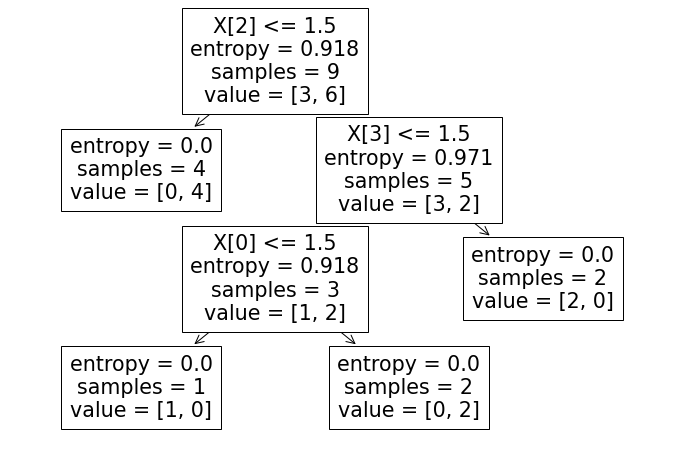

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(en.fit(X_train, y_train))